## Matplotlib Boxplots, but improved

Coding up impressive boxplots in Matplotlib is laborious and time-consuming, so why not define a few functions to do all of the work for us?

In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.insert(0,"../")
# our main import
import turbopanda as turb

import matplotlib.pyplot as plt
%matplotlib inline

print("turbopanda: %s" % turb.__version__)

turbopanda: 0.2.6


## The basic 1D case

Even plotting a single box, in a boxplot can be particularly challenging to look good unless you want to learn the entire matplotlib library (which we've done!)

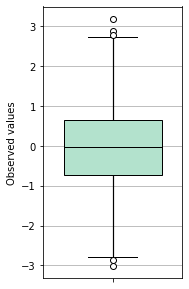

In [2]:
x = np.random.randn(1000)
turb.plot.box1d(x)
plt.show()

We can choose to plot horizontally instead of vertically on the y-axis:

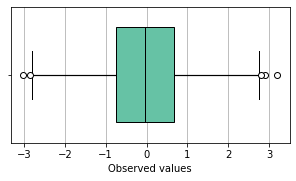

In [3]:
turb.plot.box1d(x, vertical=False)
plt.show()

Many of the familiar aspects from Matplotlib come over, such as `notch` and `grid` arguments:

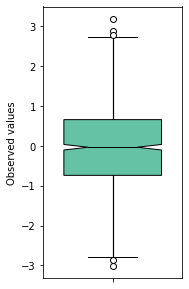

In [4]:
turb.plot.box1d(x, grid=False, notch=True)
plt.show()

Further to this, we can specify a label for the axis, and colors if you want:

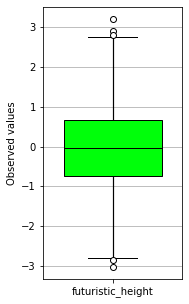

In [5]:
turb.plot.box1d(x, color='#00ff0a', label='futuristic_height')
plt.show()

We can also specify which spines we want to appear on the axis - to optionally trim down the plot as we see fit.

Note that the median line automatically changes between black and white depending on the luminousity of the facecolour:

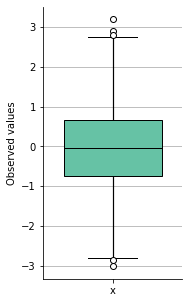

In [6]:
turb.plot.box1d(x, spines=['bottom', 'left'], label='x')
plt.show()

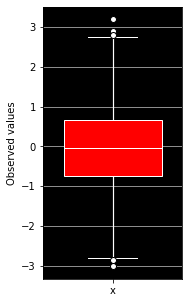

In [7]:
turb.plot.box1d(x, color='red', label='x')
plt.show()

We can set a `theme` for the flier points as well; by default they are white circles. Every matplotlib option should be available, as long as you use the colour first and the marker shape second.

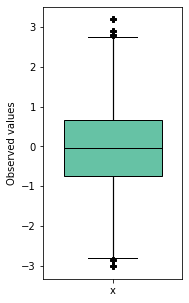

In [8]:
turb.plot.box1d(x, label='x', theme="black_cross", grid=False)
plt.show()

Note that if a `pandas.Series` object is used as input for the data, the label is automatically adopted:

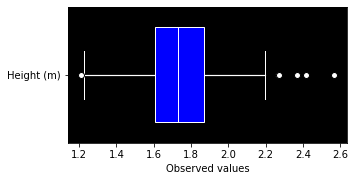

In [9]:
x2 = pd.Series(np.random.normal(1.75, .21, size=500), name='Height (m)')
ax = turb.plot.box1d(x2, color='blue', vertical=False, grid=False)
plt.show()

We can also add as an overlay a `stripplot` to demonstrate where all of the respective points are:

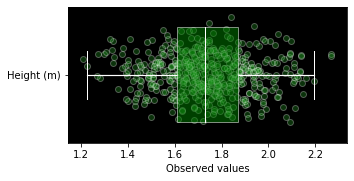

In [10]:
ax = turb.plot.box1d(x2, color='green', vertical=False, grid=False, with_strip=True)
plt.show()

We also allow label rotation for those particularly long labels. This comes in handy especially when we have multiple boxplots for the more complex graphs.

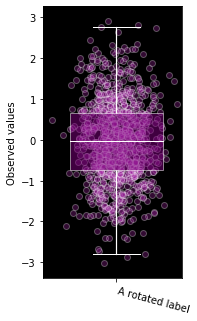

In [11]:
ax = turb.plot.box1d(x, label="A rotated label", color='purple', 
                     grid=False, with_strip=True, label_rotation=-15.)
plt.show()

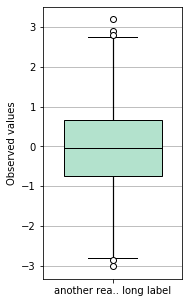

In [12]:
turb.plot.box1d(x, label='another reaaaaaally long label')
plt.show()

In addition to these, for very long labels, these are automatically truncated to a fixed length to prevent cluttering, whereby the length parameter is something you can specify:

## Comparisons between two samples: Automatic statistical testing

There are a large number of use cases where two sample experiments which to be compared against each other.

We can achieve this with the `bibox1d` method, which accepts $X$ and $Y$ arguments, treating them as separate arrays.

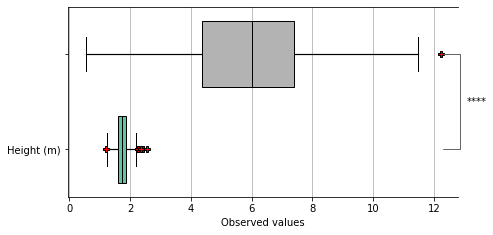

In [13]:
x3 = np.random.normal(6, 2., size=200)
ax = turb.plot.bibox1d(x2, x3, vertical=False, grid=True, theme="red_cross")
plt.show()

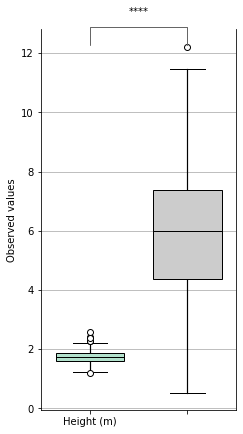

In [14]:
ax = turb.plot.bibox1d(x2, x3, grid=True)
plt.show()

By default a Mann-Whitney test is conducted between the two vectors. This can be switched off if not desired:

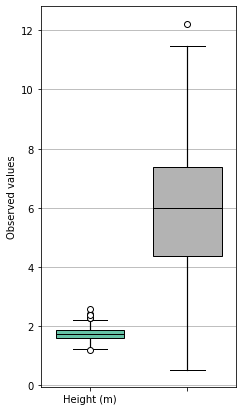

In [15]:
ax = turb.plot.bibox1d(x2, x3, mannwhitney=False)
plt.show()

In [16]:
np.isclose(0., 0.0005)

False

We can also overlay the plot with a `stripplot` of all of the points. Notice that adding a strip automatically reduces the alpha of the box such that the points can be clearly seen through it.

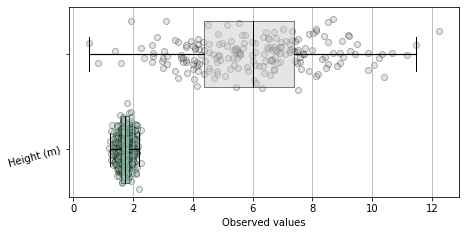

In [17]:
ax = turb.plot.bibox1d(x2, x3, vertical=False, mannwhitney=False,
                       with_strip=True, label_rotation=15)
plt.show()

## Testing with real-world dataset

We will work with the california housing dataset to show differences between various features using boxplots.

In [18]:
from sklearn.datasets import fetch_california_housing
cal = fetch_california_housing()
df_cal = pd.DataFrame(cal['data'], columns=cal['feature_names']).assign(MedianHouseValue=cal['target'])

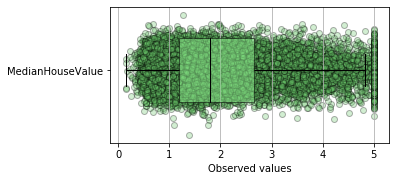

In [19]:
turb.plot.box1d(df_cal['MedianHouseValue'], vertical=False, color='lightgreen', with_strip=True)

In this example, the variable we're looking it isn't particularly readable, so we want to scale the axis using a log transformation:

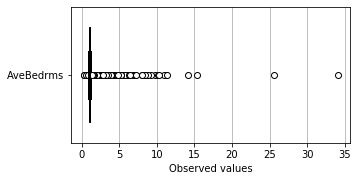

In [20]:
ax = turb.plot.box1d((df_cal['AveBedrms']), vertical=False, color='lightblue')

Note this also updates the label.

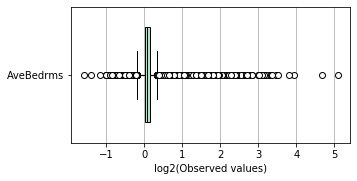

In [21]:
ax = turb.plot.box1d(df_cal['AveBedrms'], vertical=False, axis_scale="log2")

## Continuing to $k$-dimension case

In a number of example cases we want to plot a boxplot according to the **orientation** of our dataset.

- **Seaborn** provides clean *long-form* visualization of datasets, but struggles to work with short-form.
- **Matplotlib** provides *fairly easy* use for short-form, but struggles with long.

Thus our solution is to provide `widebox` and `longbox` functions, to determine how to plot a set of boxplots according
to the orientation of the users' dataset.

Some examples of *widebox* are below:

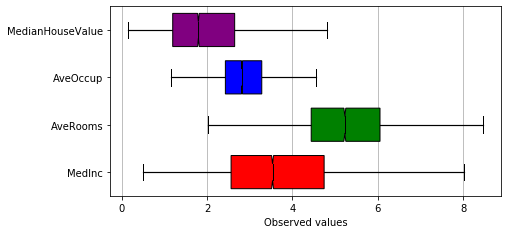

In [22]:
turb.plot.widebox(df_cal[['MedInc','AveRooms','AveOccup','MedianHouseValue']],
                  colors=['r','g','b','purple'],
                   outliers=False, vertical=False, notch=True,
                  bootstrap=1000)
plt.show()